# Krish Patel | Housing Price Predictor

## Initialization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
%matplotlib inline

## Data Analysis

### Adjusting Data

In [2]:
import pandas as pd
df=pd.read_csv('data/housing.csv', sep=',')
df
df_adjusted = df[["Avg. Area House Age", "Avg. Area Number of Rooms", "Price"]] # keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price
df_adjusted

,Avg. Area House Age,Avg. Area Number of Rooms,Price
0,5.682861,7.009188,1.059034e+06
1,6.002900,6.730821,1.505891e+06
2,5.865890,8.512727,1.058988e+06
3,7.188236,5.586729,1.260617e+06
4,5.040555,7.839388,6.309435e+05
...,...,...,...
4995,7.830362,6.137356,1.060194e+06
4996,6.999135,6.576763,1.482618e+06
4997,7.250591,4.805081,1.030730e+06
4998,5.534388,7.130144,1.198657e+06


In [3]:
## Data is split into 90% training and 10% testing
df_testing = df_adjusted.sample(frac=0.1, random_state = 10) # Random state for repeatable results
df_training = df_adjusted.drop(df_testing.index)
df_testing

,Avg. Area House Age,Avg. Area Number of Rooms,Price
245,5.260975,6.936548,1118047.991
4493,4.982102,7.860718,1326946.725
4583,5.674788,6.850386,1053484.869
2242,6.965104,8.966906,759044.688
3407,7.593559,7.073691,1381117.701
...,...,...,...
4897,6.041494,6.182283,1169265.146
835,6.837193,7.119862,1538922.903
2713,5.186638,6.285207,1228879.867
4056,6.099808,5.548363,1116680.146


### Normalizing Data

In [4]:
x0 = df_training.iloc[:,[0]]
x1 = df_training.iloc[:,[1]]
y = df_training.iloc[:,[2]]

scaler = MinMaxScaler()
X0_scaled_values = scaler.fit_transform(x0)
X1_scaled_values = scaler.fit_transform(x1)
Y_scaled_values = scaler.fit_transform(y)
X_scaled_values = [X0_scaled_values,X1_scaled_values]
### END ANSWER

# call the scaled vectors x and y
x = X_scaled_values
y = Y_scaled_values

### Plotting Data

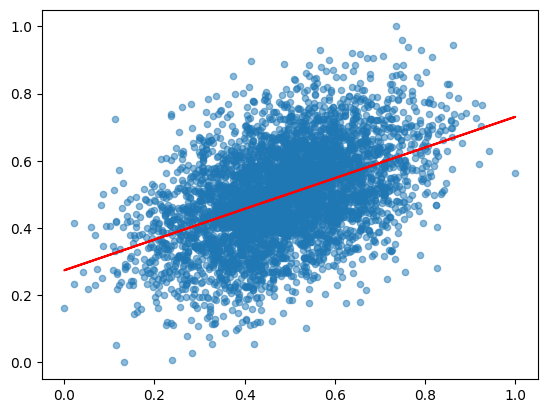

In [5]:
plt.scatter(x[0], y, alpha=0.5, s=20)
m, b = np.polyfit(x[0].flatten(), y, 1)
plt.plot(x[0], m*x[0]+b, color ='red')

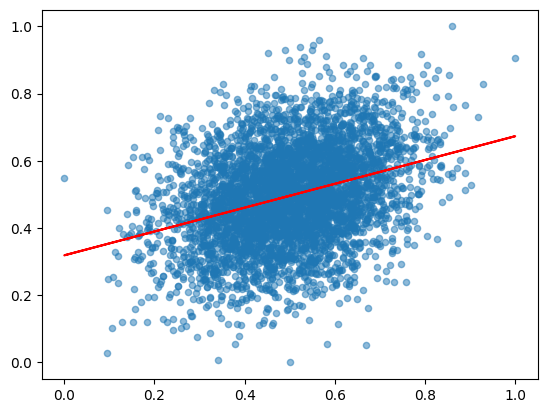

In [6]:
plt.scatter(x[1], y, alpha=0.5, s=20)
m, b = np.polyfit(x[1].flatten(), y, 1)
plt.plot(x[1], m*x[1]+b, color ='red')

## Creating Model


### Hypothesis Function
$y = \theta_2*x_2 + \theta_1*x_1 + \theta_0$

### Find thetas & minimize loss using Gradient Descent algorithm (with L2 loss)

In [7]:
def gd22(obsX, obsY, alpha, threshold):
    theta0 = 0
    theta1 = 0
    theta2 = 0
    oldError = -1
    newError = 0
    iterations = 0
    while abs(newError - oldError) >= threshold:
        oldError = np.mean(np.square((theta2*obsX[1]+theta1*obsX[0]+theta0)-obsY))
        val = (theta2*obsX[1]+theta1*obsX[0]+theta0)-obsY
        theta0 = theta0 - alpha*float(np.sum(val)/len(obsX[0]))
        theta1 = theta1 - alpha*float(np.sum(val*obsX[0])/len(obsX[0]))
        theta2 = theta2 - alpha*float(np.sum(val*obsX[1])/len(obsX[0]))
        newError = np.mean(np.square(((theta2*obsX[1]+theta1*obsX[0]+theta0)-obsY)))
        iterations += 1
        print("theta0 = "+str(theta0)+" theta1 = "+str(theta1)+" theta2 = "+str(theta2)+" error = "+str(newError))
    return theta0, theta1, theta2, newError, iterations

theta0,theta1,theta2, newError,iterations = gd22(x,y,0.01,0.0001)
print(newError)

theta0 = 0.004960574701870144 theta1 = 0.002502452469710672 theta2 = 0.002541719055105841 error = 0.25931541566148886
theta0 = 0.009846698210935926 theta1 = 0.004968253434456735 theta2 = 0.005045792620279014 error = 0.25212448735544024
theta0 = 0.01465948102408923 theta1 = 0.007397949440470358 theta2 = 0.00751278216083123 error = 0.2451464441936077
theta0 = 0.01940001707521169 theta1 = 0.009792078882294313 theta2 = 0.009943240767847337 error = 0.23837498319801356
theta0 = 0.024069383982211097 theta1 = 0.012151172124363986 theta2 = 0.012337713283086466 error = 0.23180398800570695
theta0 = 0.0286686432903733 theta1 = 0.014475751620775999 theta2 = 0.014696736422020292 error = 0.2254275233435705
theta0 = 0.03319884071208448 theta1 = 0.016766332033270485 theta2 = 0.01702083889503618 error = 0.21923982966671515
theta0 = 0.03766100636297804 theta1 = 0.019023420347453673 theta2 = 0.01931054152683258 error = 0.21323531795561673
theta0 = 0.04205615499455931 theta1 = 0.021247515987287004 theta2 =

### Final Model
$ y = 0.15267208476412927*x_2 + 0.15256849219621668*x_1 + 0.2923020059599478 $

## Test Model

In [8]:
x0t = df_testing.iloc[:,[0]]
x1t = df_testing.iloc[:,[1]]
yt = df_testing.iloc[:,[2]]

scaler = MinMaxScaler()
X0_scaled_values = scaler.fit_transform(x0t)
X1_scaled_values = scaler.fit_transform(x1t)
X_scaled_values = [X0_scaled_values,X1_scaled_values]
Y_scaled_values = scaler.fit_transform(yt)

# call the scaled vectors x and y
xt = X_scaled_values
yt = Y_scaled_values

## Begin ANSWER
ans = 0.1526401891421971*xt[1] + 0.15261787496276058*xt[0] + 0.2923103762189609
## End ANSWER
error_gd = float(np.sum(abs(ans-yt))/len(yt))
error_gd

0.12677014172500173

Testing Error: 12.677014172500173%